In [19]:
import numpy as np

file = open("HIV_OG_Normalized.npy","rb")
HIV_OG = np.load(file)
file = open("HIV_Recon_Normalized.npy","rb")
HIV_Recon = np.load(file)

file = open("HIV_Common_mzs.npy","rb")
common_mzs = np.array(np.load(file))

file.close()

[100.00035858 101.00105977 102.00176096 103.00246215 104.00316334
 105.00386453 106.00456572 107.00526691 108.0059681  109.00666929]
False


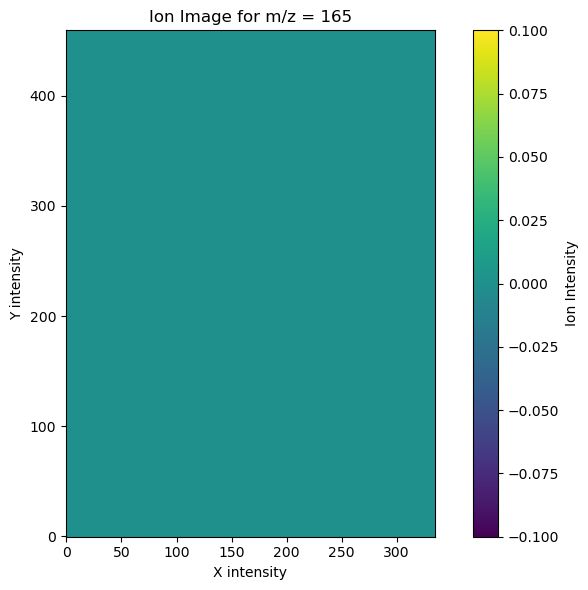

In [22]:
import matplotlib.pyplot as plt
# Choose the m/z you want to plot  and tolerance
target_mz = 165
tolerance = 0.02

# Get image dimensions
width = 335
height = 460

# Create empty image
ion_image = np.zeros((height, width))

mz_mask = (common_mzs >= target_mz - tolerance) & (common_mzs <= target_mz + tolerance)

print(common_mzs[:10])
print(np.any(mz_mask))
# Process each spectrum
for index in range(len(HIV_OG)): 
    intensities = HIV_OG[index]   
    
    # Get average intensity for the target m/z range
    if np.any(mz_mask):
        ion_intensity = np.mean(intensities[mz_mask])
    else:
        ion_intensity = 0
    
    # Convert linear index to 2D coordinates
    # This should match how your original data was indexed
    x = index % width
    y = index // width
    
    # Make sure we don't exceed image bounds
    if y < height:
        ion_image[y, x] = ion_intensity




# Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()